<a href="https://colab.research.google.com/github/Lucas-Siade/Data-Science/blob/main/Codes/Supervisionado/DS%20-%20Gradient%20Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exemplo**

## **Bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## **Dataset**

In [3]:
colunas = [
    "Classe", "Álcool", "Ácido Málico", "Cinzas", "Alcalinidade Cinzas",
    "Magnésio", "Fenóis Totais", "Flavonóides", "Fenóis Simples",
    "Proantocianidinas", "Intensidade da Cor", "Matiz", "Índice Fenólico", "Prolina"
]

datasetGB = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Dataset - Vinho.csv", header=None, names=colunas)

amostrasClasse = (
    datasetGB
    .groupby("Classe", group_keys=False)
    .apply(lambda x: x.sample(5, random_state=42))
    .reset_index(drop=True)
)

display(amostrasClasse)

<ipython-input-3-640bb14e02a2>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(5, random_state=42))


,Classe,Álcool,Ácido Málico,Cinzas,Alcalinidade Cinzas,Magnésio,Fenóis Totais,Flavonóides,Fenóis Simples,Proantocianidinas,Intensidade da Cor,Matiz,Índice Fenólico,Prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
2,1,13.51,1.80,2.65,19.0,110,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095
3,1,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
4,1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
5,2,12.72,1.81,2.20,18.8,86,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714
6,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
7,2,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
8,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420
9,2,12.08,1.39,2.50,22.5,84,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385


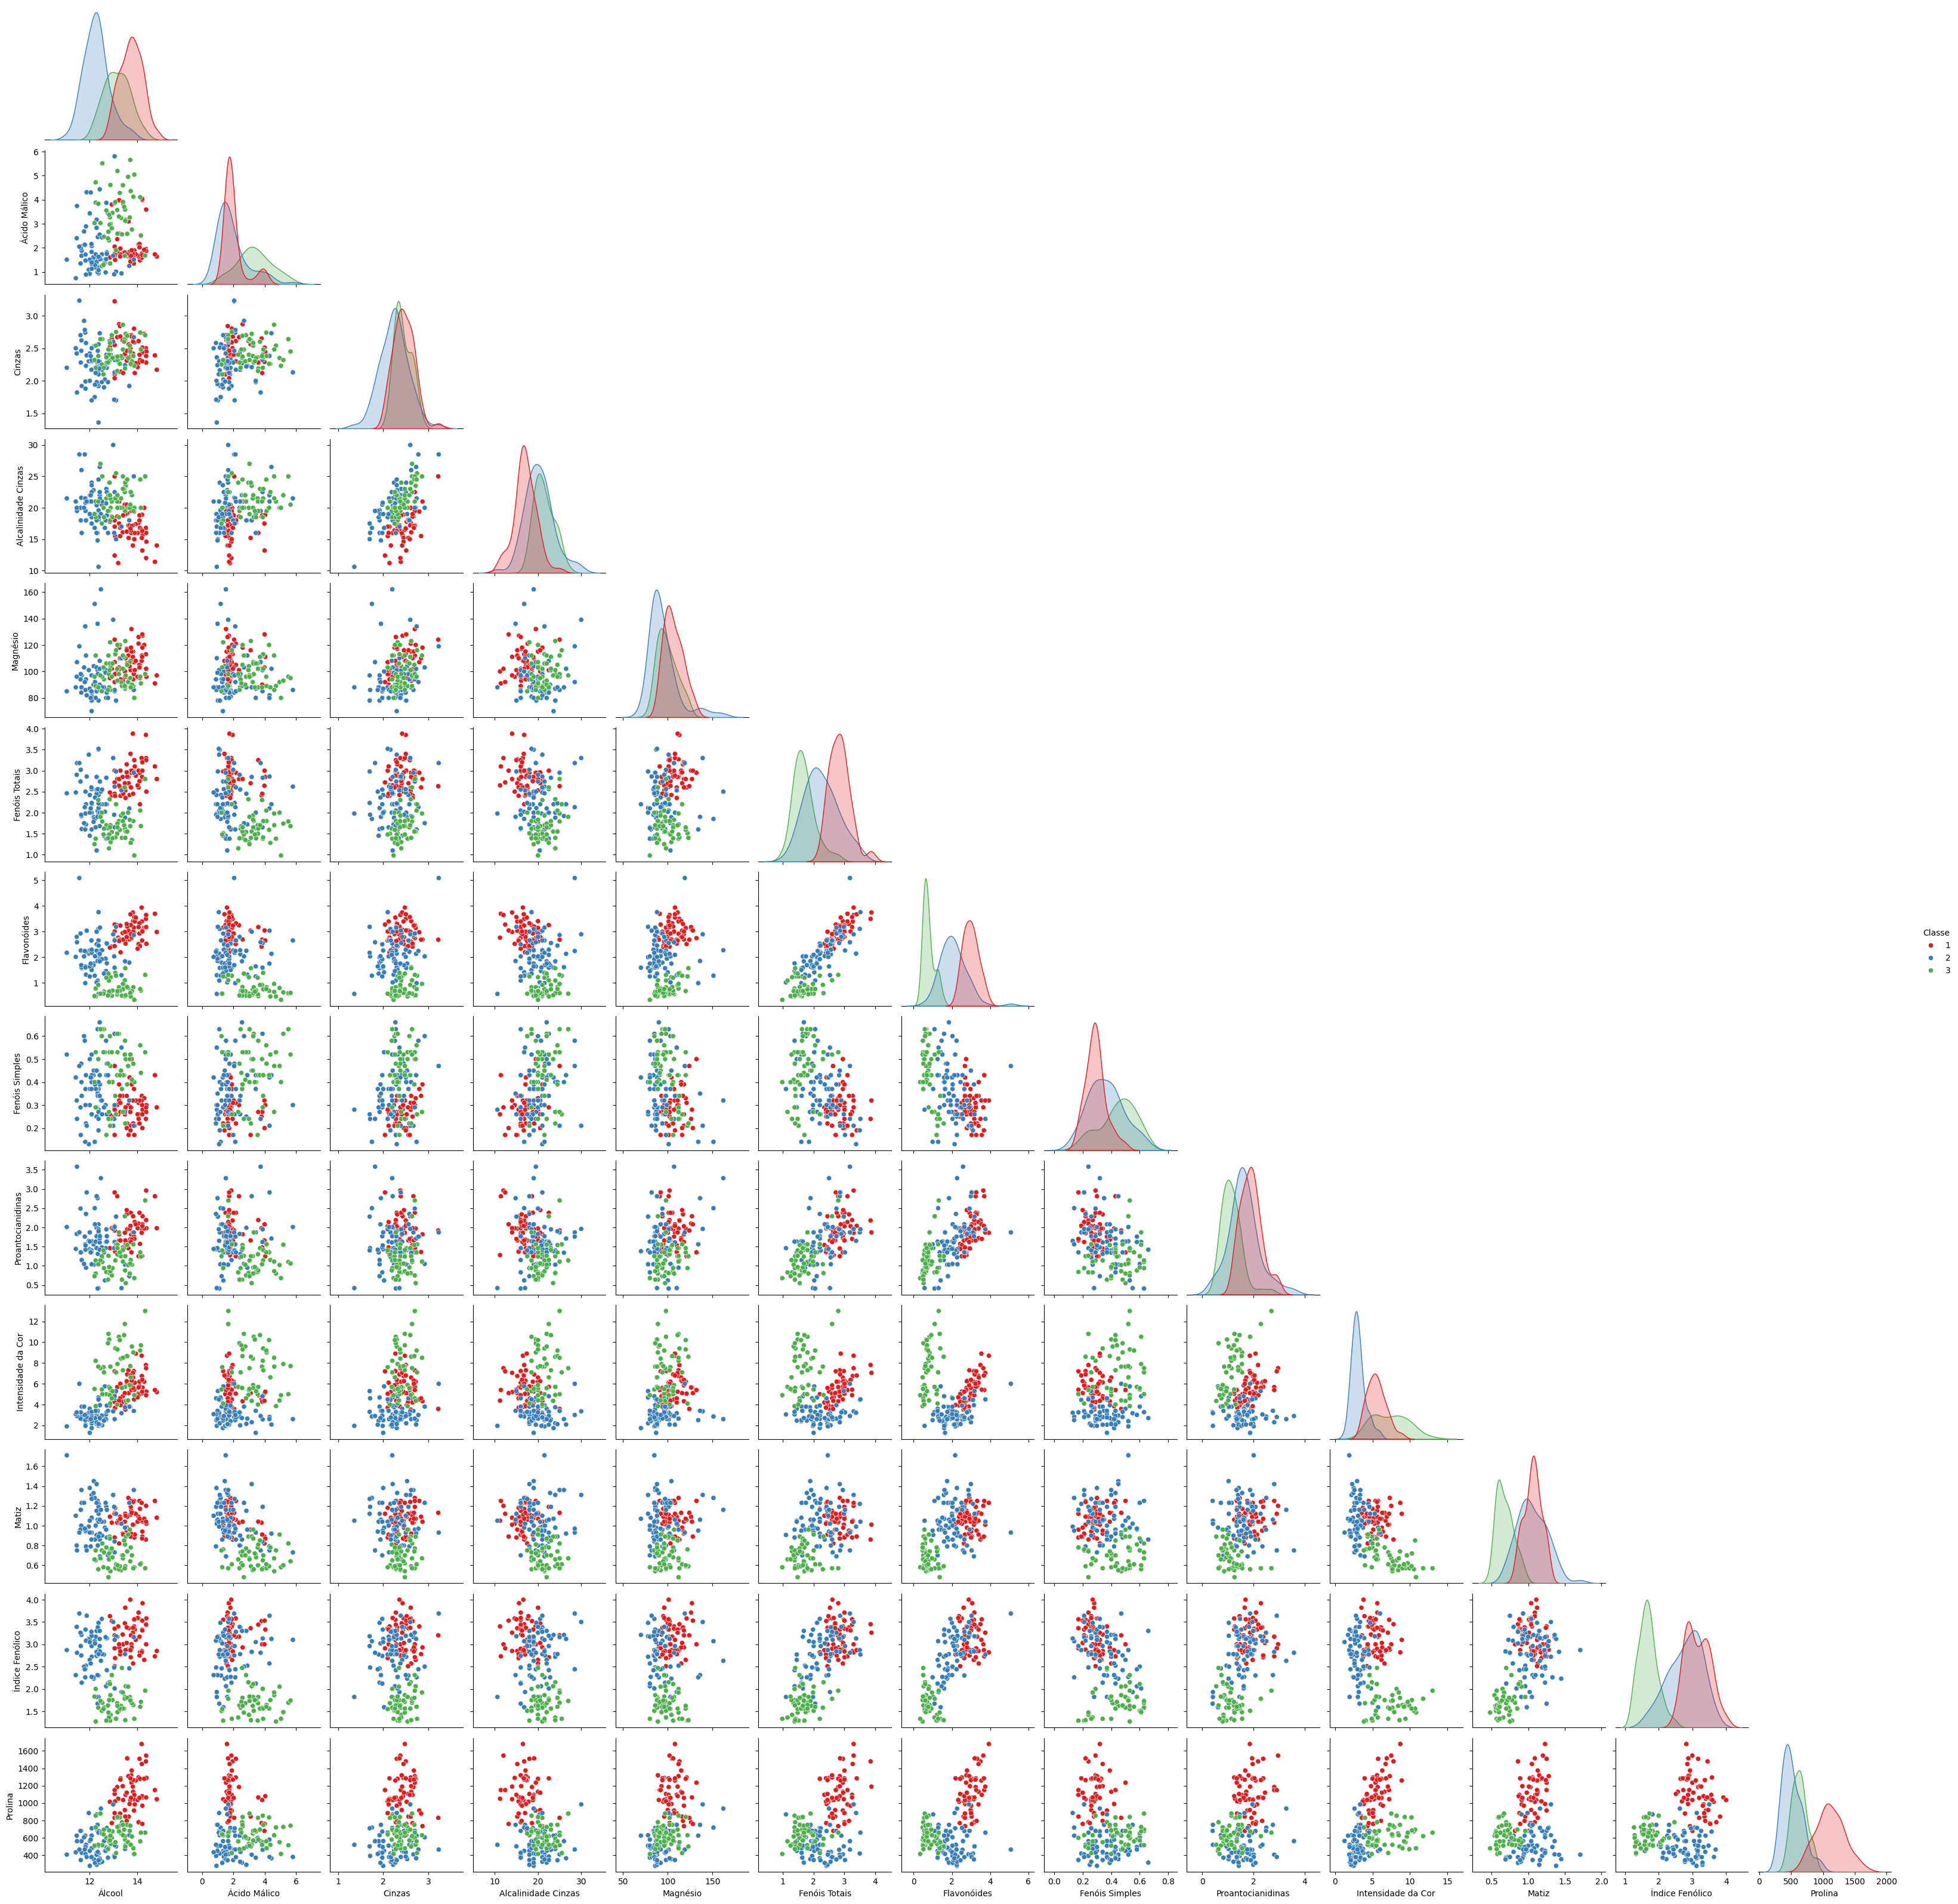

In [4]:
sns.pairplot(datasetGB, hue='Classe', palette='Set1',corner=True)
plt.show()

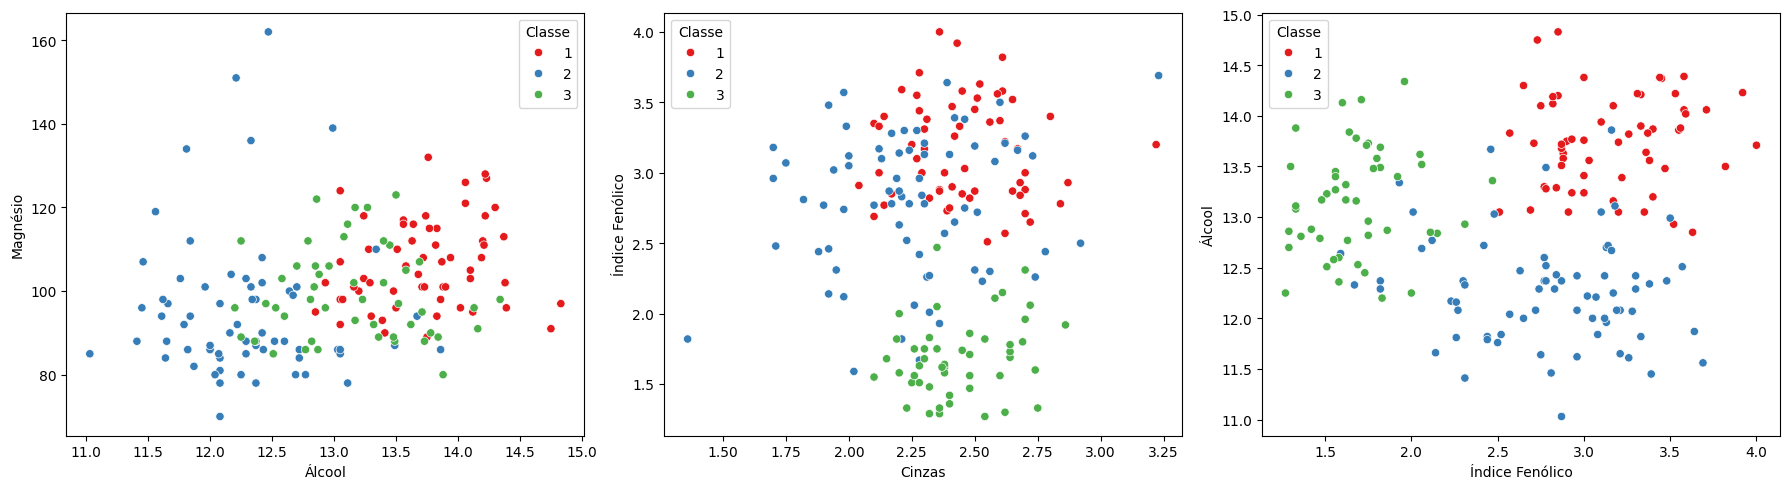

In [5]:
import random

colunas = datasetGB.columns.drop("Classe")
paresAleatorios = random.sample([(x, y) for x in colunas for y in colunas if x != y], 3)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, (x, y) in enumerate(paresAleatorios):
    sns.scatterplot(data=datasetGB, x=x, y=y, hue="Classe", palette="Set1", ax=axs[i])

plt.tight_layout()
plt.show()

<Axes: >

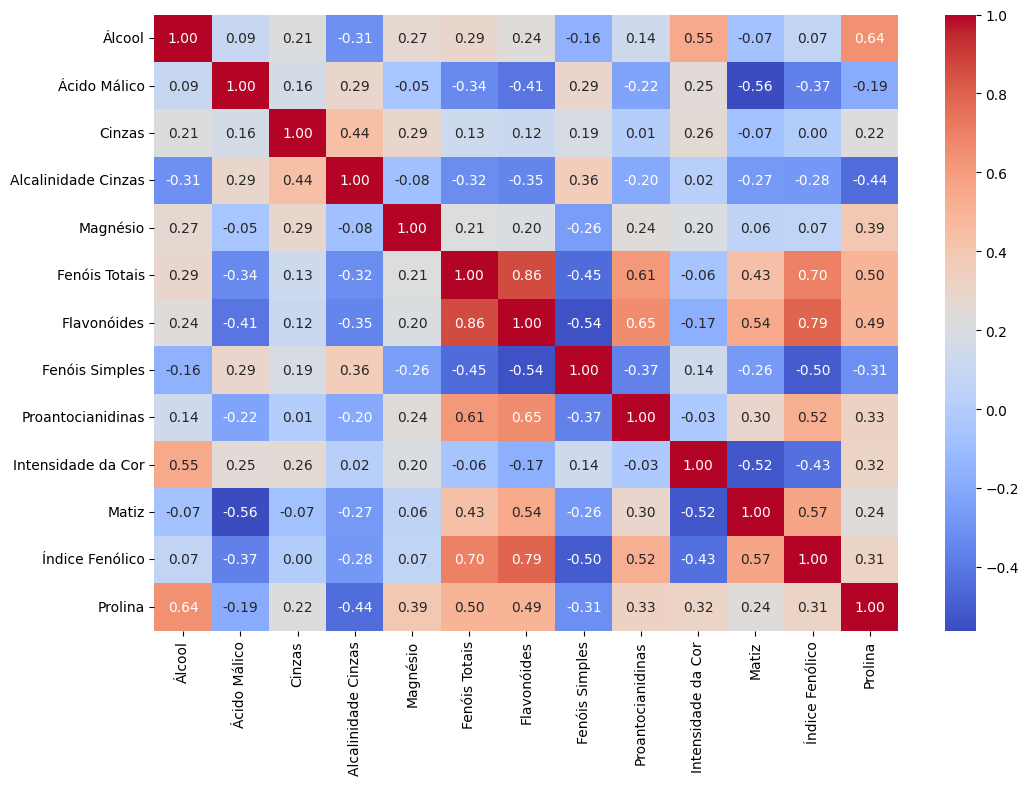

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(datasetGB.iloc[:, 1:].corr(), annot=True, fmt=".2f", cmap="coolwarm")

## **Modelo**

In [7]:
#DEFINIR VARIÁVEIS
XGB = datasetGB.drop(["Classe"], axis=1)
YGB = datasetGB["Classe"]

#DIVISÃO EM TREINO E TESTE
XGB_treino, XGB_teste, YGB_treino, YGB_teste = train_test_split(XGB, YGB, test_size=0.2, random_state=42, stratify=YGB)

#TREINO DO MODELO
modelGB = GradientBoostingClassifier(random_state=42)
modelGB.fit(XGB_treino, YGB_treino)

GradientBoostingClassifier(random_state=42)

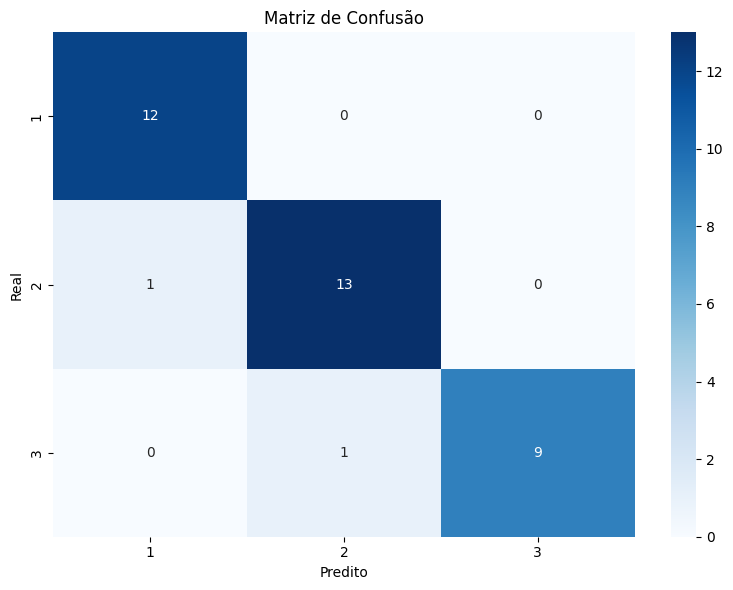

In [8]:
YGB_pred = modelGB.predict(XGB_teste)

#MATRIZ DE CONFUSÃO
CM = confusion_matrix(YGB_teste, YGB_pred)
labels = ['1', '2', '3']

plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')

plt.tight_layout()
plt.show()

## **Extra**

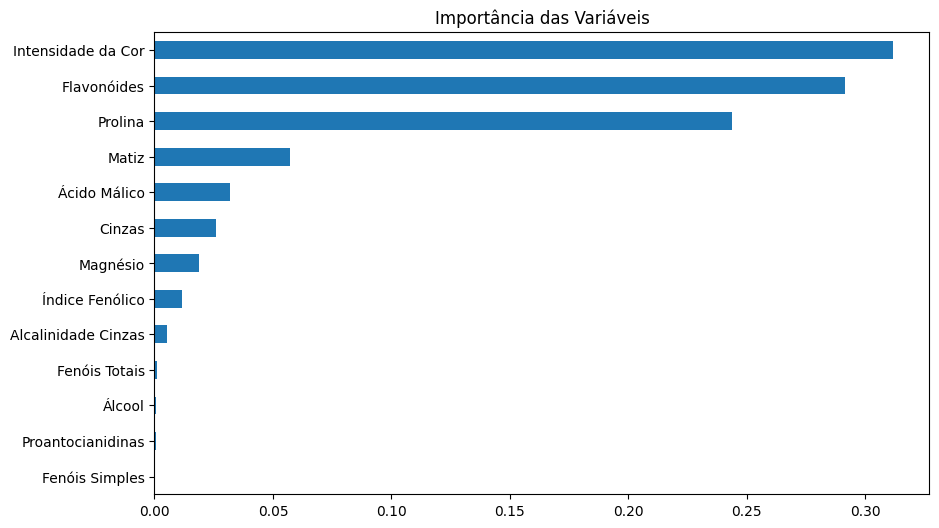

In [9]:
importancias = pd.Series(modelGB.feature_importances_, index=XGB.columns)
importancias.sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title("Importância das Variáveis")
plt.show()